## Normalizacja

In [1]:
data = read.csv("day.csv")
keeps <- c("temp","atemp",  "hum", "windspeed", "cnt")
df = data[keeps]
head(df)

temp,atemp,hum,windspeed,cnt
0.344167,0.363625,0.805833,0.1604460,985
0.363478,0.353739,0.696087,0.2485390,801
0.196364,0.189405,0.437273,0.2483090,1349
0.200000,0.212122,0.590435,0.1602960,1562
0.226957,0.229270,0.436957,0.1869000,1600
0.204348,0.233209,0.518261,0.0895652,1606


In [2]:
x <- df
normalized = (x-min(x))/(max(x)-min(x))
head(normalized)
range(normalized)

temp,atemp,hum,windspeed,cnt
3.949587e-05,4.172883e-05,9.247567e-05,1.841244e-05,0.11303649
4.171196e-05,4.059433e-05,7.988146e-05,2.852180e-05,0.09192105
2.253431e-05,2.173571e-05,5.018051e-05,2.849541e-05,0.15480835
2.295157e-05,2.434267e-05,6.775706e-05,1.839523e-05,0.17925178
2.604510e-05,2.631053e-05,5.014425e-05,2.144824e-05,0.18361258
2.345054e-05,2.676257e-05,5.947452e-05,1.027831e-05,0.18430112


[1] 0 1

In [3]:
cor(normalized)

,temp,atemp,hum,windspeed,cnt
temp,1.0000000,0.9917016,0.1269629,-0.1579441,0.6274940
atemp,0.9917016,1.0000000,0.1399881,-0.1836430,0.6310657
hum,0.1269629,0.1399881,1.0000000,-0.2484891,-0.1006586
windspeed,-0.1579441,-0.1836430,-0.2484891,1.0000000,-0.2345450
cnt,0.6274940,0.6310657,-0.1006586,-0.2345450,1.0000000



Call:
lm(formula = normalized$cnt ~ normalized$temp + normalized$atemp + 
    normalized$hum + normalized$windspeed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55716 -0.12005 -0.00907  0.12111  0.40901 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.430e-01  4.078e-02  10.862  < 2e-16 ***
normalized$temp       2.112e+03  2.282e+03   0.925   0.3551    
normalized$atemp      5.139e+03  2.577e+03   1.994   0.0465 *  
normalized$hum       -3.149e+03  3.840e+02  -8.201 1.08e-15 ***
normalized$windspeed -4.529e+03  7.211e+02  -6.280 5.82e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1632 on 726 degrees of freedom
Multiple R-squared:  0.4638,	Adjusted R-squared:  0.4609 
F-statistic:   157 on 4 and 726 DF,  p-value: < 2.2e-16


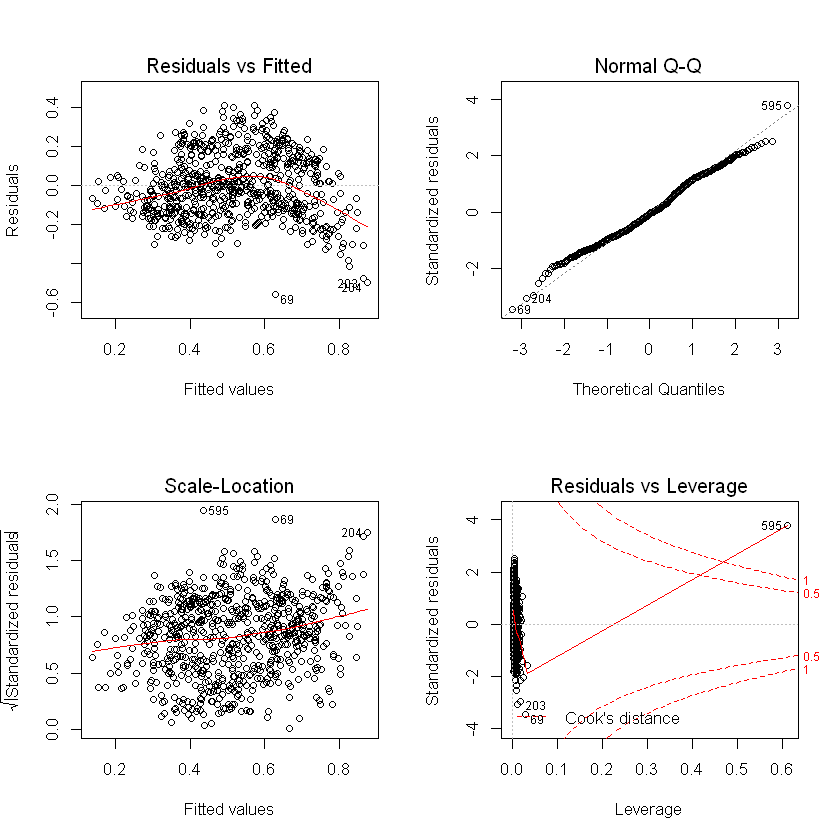

In [5]:
model <- lm(normalized$cnt~normalized$temp + normalized$atemp + normalized$hum + normalized$windspeed)
summary(model)
par(mfrow=c(2, 2))
plot(model)

** W sumie po normalizacji bez zmian **

## Dodaje kolumnę z procentowym udziałem zarejestrowanych userów w całości cnt wypozyczonych rowerow

In [6]:
data_p <- data.frame(df, 'percent' = (data$registered / data$cnt))
head(data_p)

temp,atemp,hum,windspeed,cnt,percent
0.344167,0.363625,0.805833,0.1604460,985,0.6639594
0.363478,0.353739,0.696087,0.2485390,801,0.8364544
0.196364,0.189405,0.437273,0.2483090,1349,0.9110452
0.200000,0.212122,0.590435,0.1602960,1562,0.9308579
0.226957,0.229270,0.436957,0.1869000,1600,0.9487500
0.204348,0.233209,0.518261,0.0895652,1606,0.9452055



Call:
lm(formula = data_p$cnt ~ data_p$temp + data_p$atemp + data_p$hum + 
    data_p$windspeed + data_p$percent)

Residuals:
    Min      1Q  Median      3Q     Max 
-4842.1 -1050.5   -74.9  1058.0  3553.0 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3951.2      591.3   6.683 4.68e-11 ***
data_p$temp        2112.4     2283.7   0.925   0.3553    
data_p$atemp       5111.9     2582.6   1.979   0.0482 *  
data_p$hum        -3140.5      386.9  -8.118 2.04e-15 ***
data_p$windspeed  -4521.7      722.5  -6.258 6.65e-10 ***
data_p$percent     -103.0      535.7  -0.192   0.8476    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1423 on 725 degrees of freedom
Multiple R-squared:  0.4639,	Adjusted R-squared:  0.4602 
F-statistic: 125.5 on 5 and 725 DF,  p-value: < 2.2e-16


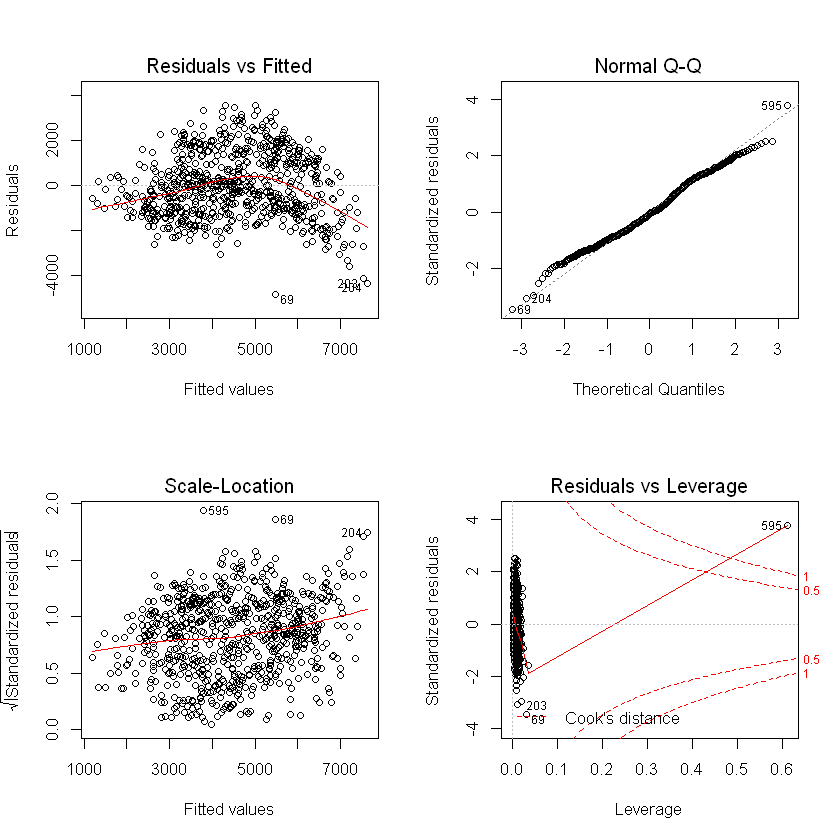

In [7]:
model2 <- lm(data_p$cnt~data_p$temp +data_p$atemp+ data_p$hum + data_p$windspeed + data_p$percent)
summary(model2)
par(mfrow=c(2, 2))
plot(model2)

Praktycznie bez zmian

## Wartości odstające

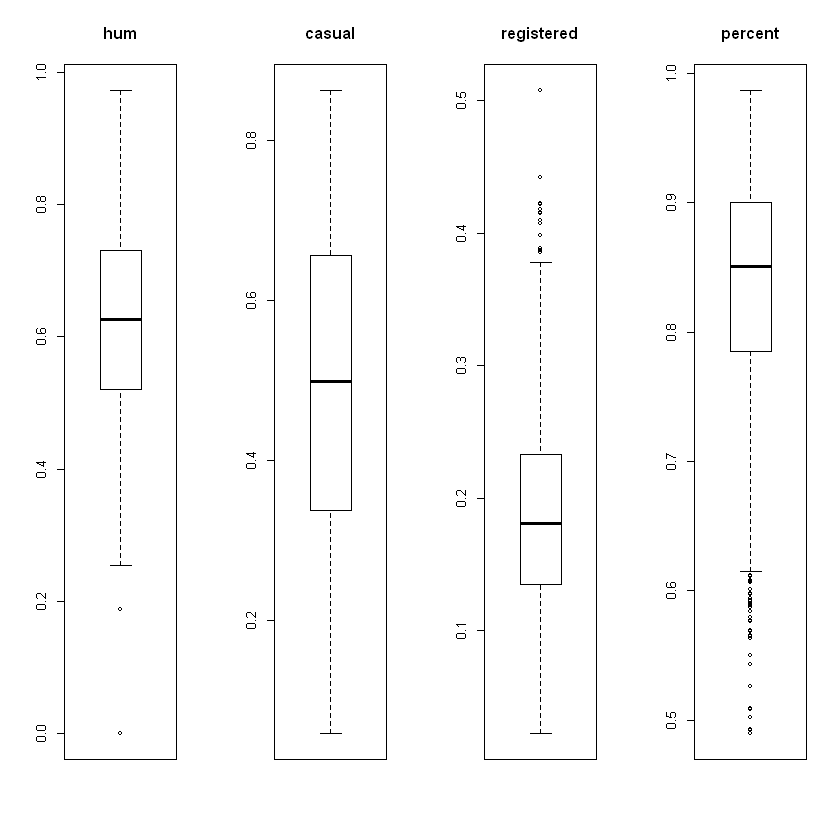

In [8]:
par(mfrow=c(1, 4))

boxplot(data_p$hum, main="hum")
boxplot(data_p$temp, main="casual")
boxplot(data_p$windspeed, main="registered")
boxplot(data_p$percent, main="percent")

In [13]:
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 1.5 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}

withoutOutliers <- data.frame(
    'hum' = remove_outliers(data_p$hum),
    'temp' = remove_outliers(data_p$temp),
    'atemp' = remove_outliers(data_p$atemp),
    'windspeed' = remove_outliers(data_p$windspeed),
    'percent' = remove_outliers(data_p$percent),
    'cnt' = data_p$cnt)
head(withoutOutliers)

hum,temp,atemp,windspeed,percent,cnt
0.805833,0.344167,0.363625,0.1604460,0.6639594,985
0.696087,0.363478,0.353739,0.2485390,0.8364544,801
0.437273,0.196364,0.189405,0.2483090,0.9110452,1349
0.590435,0.200000,0.212122,0.1602960,0.9308579,1562
0.436957,0.226957,0.229270,0.1869000,0.9487500,1600
0.518261,0.204348,0.233209,0.0895652,0.9452055,1606


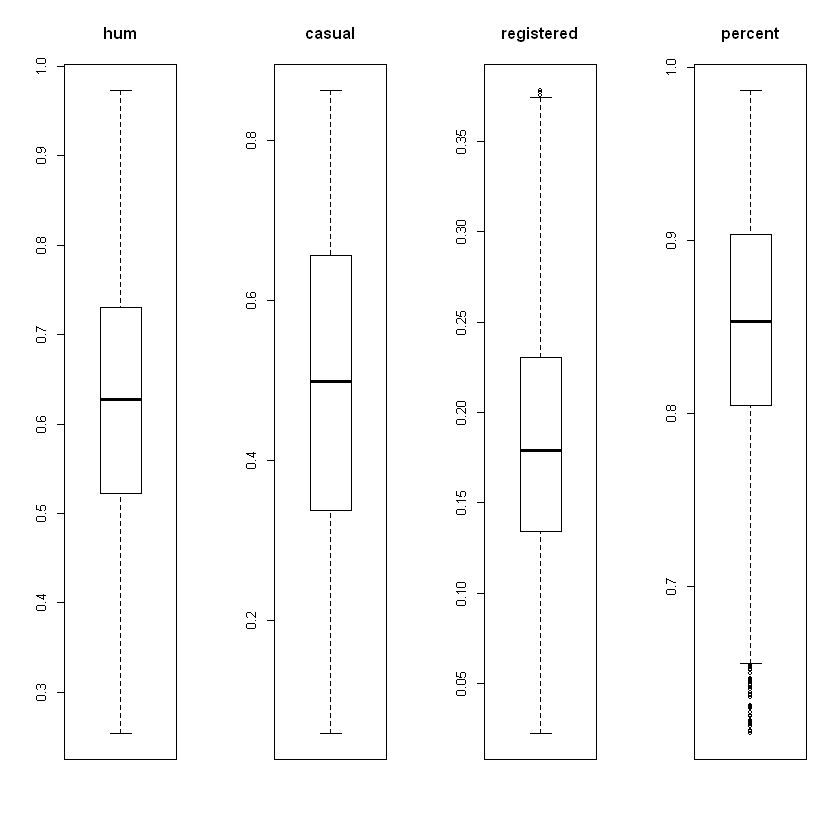

In [103]:
par(mfrow=c(1, 4))

boxplot(withoutOutliers$hum, main="hum")
boxplot(withoutOutliers$temp, main="casual")
boxplot(withoutOutliers$windspeed, main="registered")
boxplot(withoutOutliers$percent, main="percent")


Call:
lm(formula = withoutOutliers$cnt ~ withoutOutliers$temp + withoutOutliers$atemp + 
    withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$percent)

Residuals:
    Min      1Q  Median      3Q     Max 
-4398.6 -1074.9   -63.9  1092.3  3445.2 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4793.0      700.6   6.841 1.76e-11 ***
withoutOutliers$temp        1917.2     2315.8   0.828   0.4080    
withoutOutliers$atemp       5073.5     2619.8   1.937   0.0532 .  
withoutOutliers$hum        -3431.5      405.7  -8.458  < 2e-16 ***
withoutOutliers$windspeed  -4493.4      798.1  -5.630 2.64e-08 ***
withoutOutliers$percent     -732.8      659.9  -1.110   0.2672    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1420 on 675 degrees of freedom
  (50 observations deleted due to missingness)
Multiple R-squared:  0.4673,	Adjusted R-squared:  0.4633 
F-statistic: 118.4 on 5 

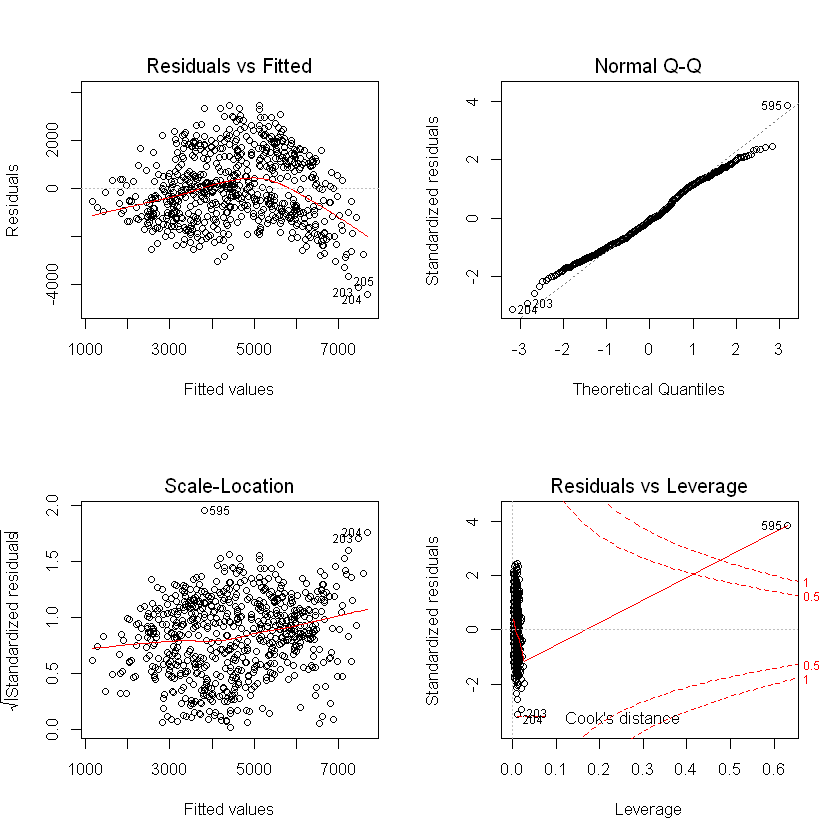

In [19]:
model3 <- lm(withoutOutliers$cnt~withoutOutliers$temp + withoutOutliers$atemp + withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$percent)
summary(model3)
par(mfrow=c(2, 2))
plot(model3)

Metoda backward

In [23]:
model3.backward <- step(model3, direction="backward", trace=1)

Start:  AIC=9891.87
withoutOutliers$cnt ~ withoutOutliers$temp + withoutOutliers$atemp + 
    withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$percent

                            Df Sum of Sq        RSS    AIC
- withoutOutliers$temp       1   1381926 1362331849 9890.6
- withoutOutliers$percent    1   2486355 1363436277 9891.1
<none>                                   1360949923 9891.9
- withoutOutliers$atemp      1   7561664 1368511586 9893.6
- withoutOutliers$windspeed  1  63916036 1424865959 9921.1
- withoutOutliers$hum        1 144245816 1505195739 9958.5

Step:  AIC=9890.56
withoutOutliers$cnt ~ withoutOutliers$atemp + withoutOutliers$hum + 
    withoutOutliers$windspeed + withoutOutliers$percent

                            Df Sum of Sq        RSS     AIC
- withoutOutliers$percent    1   2540777 1364872626  9889.8
<none>                                   1362331849  9890.6
- withoutOutliers$windspeed  1  62618540 1424950389  9919.2
- withoutOutliers$hum        1 1

ERROR: Error in step(model3, direction = "backward", trace = 1): number of rows in use has changed: remove missing values?


Metoda forward

In [25]:
model3.forward <- step(model3, direction="forward", trace=1, scope= ~withoutOutliers$temp + withoutOutliers$atemp + withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$percent)

Start:  AIC=9891.87
withoutOutliers$cnt ~ withoutOutliers$temp + withoutOutliers$atemp + 
    withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$percent




Call:
lm(formula = withoutOutliers$cnt ~ withoutOutliers$temp + withoutOutliers$atemp + 
    withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$percent)

Residuals:
    Min      1Q  Median      3Q     Max 
-4398.6 -1074.9   -63.9  1092.3  3445.2 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4793.0      700.6   6.841 1.76e-11 ***
withoutOutliers$temp        1917.2     2315.8   0.828   0.4080    
withoutOutliers$atemp       5073.5     2619.8   1.937   0.0532 .  
withoutOutliers$hum        -3431.5      405.7  -8.458  < 2e-16 ***
withoutOutliers$windspeed  -4493.4      798.1  -5.630 2.64e-08 ***
withoutOutliers$percent     -732.8      659.9  -1.110   0.2672    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1420 on 675 degrees of freedom
  (50 observations deleted due to missingness)
Multiple R-squared:  0.4673,	Adjusted R-squared:  0.4633 
F-statistic: 118.4 on 5 

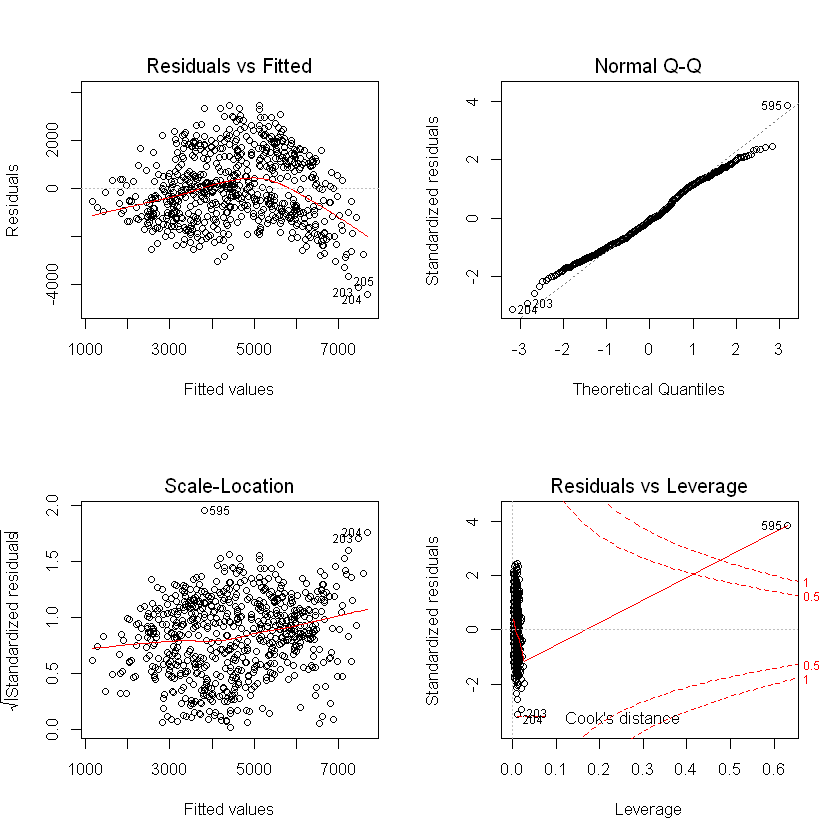

In [26]:
model4 <- lm(withoutOutliers$cnt~withoutOutliers$atemp + withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$percent)
summary(model3)
par(mfrow=c(2, 2))
plot(model3)